In [1]:
import time
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo $\pi$

The simplest way to find the $\pi$ number is to simulate the Monte Carlo problem. If we have a square of side $2*r$ and a circle with radiu $r$ inscribed in the square we can thrown darts randomicaly in this space(sample). After many attempts we can compare the number of hits in side de circle and the total trials. 

$$\frac{hits}{ntrials} \approx \frac{A_c}{A_s}=\frac{\pi r**2}{(2r)**2}$$

In [2]:
def estimated_pi(n_trials):
    count_hits = 0
    #random.seed(123) 
    for i in range(n_trials):
        x , y = random.random() , random.random() #random.uniform(0,n) for major than 1
        if (x ** 2 + y ** 2 <= 1):
            count_hits += 1

    return (4 * float(count_hits) / n_trials)
ini = time.time()
A = estimated_pi(400000)
end= time.time()
print(A, end-ini)

3.14102 0.14777731895446777


In [3]:
def n_estimated_pi(n_trials):
    count_hits = 0
    espectrum_trials = np.linspace(1,n_trials,n_trials, dtype=int) #Give me a vector of all spectrum of tries
    pis = np.zeros(n_trials) #it will save the hits/trials
    mean_pi = np.zeros(n_trials)
    rms = np.zeros(n_trials)
    timeeach = np.zeros(n_trials)
    
    for i, j in enumerate(espectrum_trials):
        ini = time.time()
        pis[i] = estimated_pi(j)
        
        mean_pi[i] = sum(pis[0:i+1])/(i+1)
        rms_temp = 0
        for k in range(len(pis[0:i+1])):
            rms_temp +=(pis[k] - np.pi)**2
        rms[i] += np.sqrt( rms_temp/(len(pis[0:i+1]))   )

        
        end = time.time()
        timeeach[i] = end-ini 
    return espectrum_trials , pis , mean_pi , rms , timeeach


In [4]:
MC_pi = n_estimated_pi(50000)

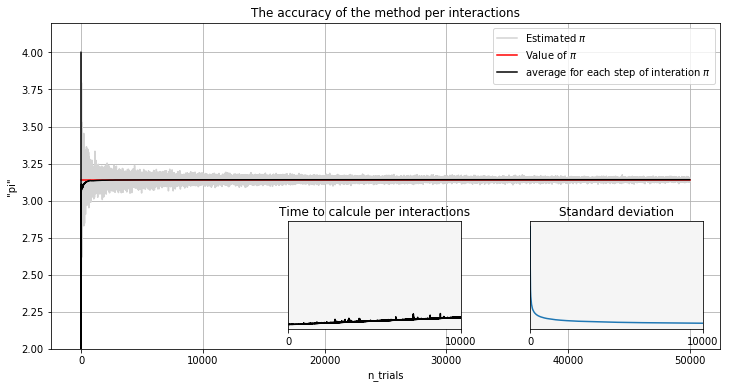

In [10]:
plt.figure(figsize=(12,6))
plt.plot(MC_pi[0],MC_pi[1], 'lightgray', label='Estimated $\pi$')
plt.plot([0,len(MC_pi[0])],[np.pi,np.pi], 'r', label='Value of $\pi$')
plt.plot(MC_pi[0],MC_pi[2], 'k', label='average for each step of interation $\pi$')
plt.xlabel('n_trials')
plt.ylabel('"pi"')
plt.title("The accuracy of the method per interactions")
plt.ylim(bottom=2)  
plt.legend()
plt.grid()

plt.axes([0.68, 0.17, .2, .25], facecolor='whitesmoke')
plt.plot(MC_pi[0],MC_pi[3])
plt.title('Standard deviation')
plt.xlim(0, 0.2)
plt.xticks([0,10000])
plt.yticks([])

plt.axes([0.40, 0.17, .2, .25], facecolor='whitesmoke')
plt.plot(MC_pi[0],MC_pi[4], 'k', label='Estimate of $\pi$')
plt.title("Time to calcule per interactions")
plt.xlim(0, 0.2)
plt.xticks([0,10000])
plt.yticks([])
plt.show()

# Monte Carlo - Markov Chain

Now we have another situation. imagine that we can't reach all the square. To complete all possible space we should make many trials, but now starting in a position that we stopped. if we go out the range, we do another triel from the same position.

In [11]:
def estimated_pi_MC(n_trials, reach=0.1):
    x, y, count_hits = 0.5, 0.5, 0.0 #x and y is start position. n_hits is for insede the circle
    for i in range(n_trials):
        reach_x, reach_y = random.uniform(-reach, reach), random.uniform(-reach, reach)
        if abs(x + reach_x) < 1.0 and abs(y + reach_y) < 1.0: #that gives the condition that we'll stay inside the range
            x, y = x + reach_x, y + reach_y
        if x**2 + y**2 < 1.0: 
            count_hits += 1
    
    return 4.0 * count_hits / float(n_trials)

In [12]:
def n_estimated_pi_MC(n_trials, reach=0.1):
    x, y, count_hits = 1, 1, 0.0
    espectrum_trials = np.linspace(1,n_trials,n_trials) #Give me a vector of all spectrum of tries
    pis = np.zeros(n_trials) #it will save the hits/trials
    mean_pi = np.zeros(n_trials)
    rms = np.zeros(n_trials)
    timeeach = np.zeros(n_trials)
    
    for i in range(n_trials):
        ini = time.time()
        pis[i] = estimated_pi_MC(int(i)+1, reach=0.1)
        
        mean_pi[i] = sum(pis[0:i+1])/(i+1)
        
        rms_temp = 0
        for k in range(len(pis[0:i+1])):
            rms_temp +=(pis[k] - np.pi)**2
        rms[i] += np.sqrt( rms_temp/(len(pis[0:i+1]))   )

        end = time.time()
        timeeach[i] = end-ini 
    return espectrum_trials, pis, mean_pi,rms, timeeach

In [13]:
MChain = n_estimated_pi_MC(50000, reach=0.1)

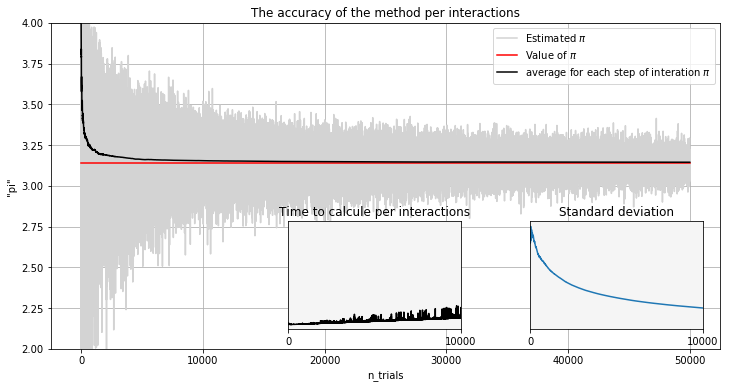

In [14]:
plt.figure(figsize=(12,6))
plt.plot(MChain[0],MChain[1], 'lightgray', label='Estimated $\pi$')
plt.plot([0,len(MChain[0])],[np.pi,np.pi], 'r', label='Value of $\pi$')
plt.plot(MChain[0],MChain[2], 'k', label='average for each step of interation $\pi$')
plt.xlabel('n_trials')
plt.ylabel('"pi"')
plt.title("The accuracy of the method per interactions")
plt.ylim(bottom=2)  
plt.ylim(top=4)
plt.legend(loc = 'upper right')
plt.grid()

a=plt.axes([0.68, 0.17, .2, .25], facecolor='whitesmoke')
plt.plot(MChain[0],MChain[3])
plt.title('Standard deviation')
plt.xlim(0, 0.2)
plt.xticks([0,10000])
plt.yticks([])

a=plt.axes([0.40, 0.17, .2, .25], facecolor='whitesmoke')
plt.plot(MChain[0],MChain[4], 'k', label='Estimate of $\pi$')
plt.title("Time to calcule per interactions")
plt.xlim(0, 0.2)
plt.xticks([0,10000])
plt.yticks([])
plt.show()

# -- TASK --